# DATA EXTRACTION AND PREPARATION

In [2]:
import pandas as pd

# Step 1: Load the dataset
data_path = '/Users/sahil/My Data/Internship/Amazon Sales/Amazon Sales data.csv'
data = pd.read_csv(data_path)

# Step 2: Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

# Step 3: Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Step 4: Data Cleaning
# Drop rows with missing values (if any)
data_cleaned = data.dropna()

# Convert data types if necessary
# For example, converting 'Order Date' and 'Ship Date' to datetime
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'])
data_cleaned['Ship Date'] = pd.to_datetime(data_cleaned['Ship Date'])

# Step 5: Filter relevant columns
# Assuming we are interested in the following columns for analysis
columns_of_interest = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Date', 'Units Sold', 'Total Revenue', 'Total Profit']
data_filtered = data_cleaned[columns_of_interest]

# Display the cleaned and filtered data
print("\nCleaned and filtered data:")
print(data_filtered.head())

# Save the cleaned data to a new CSV file
data_filtered.to_csv('cleaned_amazon_sales_data.csv', index=False)

First few rows of the dataset:
                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price

In [4]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# DATA ANALYSIS

### IMPORT Necessary Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
data = pd.read_csv('cleaned_amazon_sales_data.csv')

# Convert 'Order Date' to datetime format if not already done
data['Order Date'] = pd.to_datetime(data['Order Date'])

### 2. Sales Trend Analysis
#### a. Month-wise Sales Trend

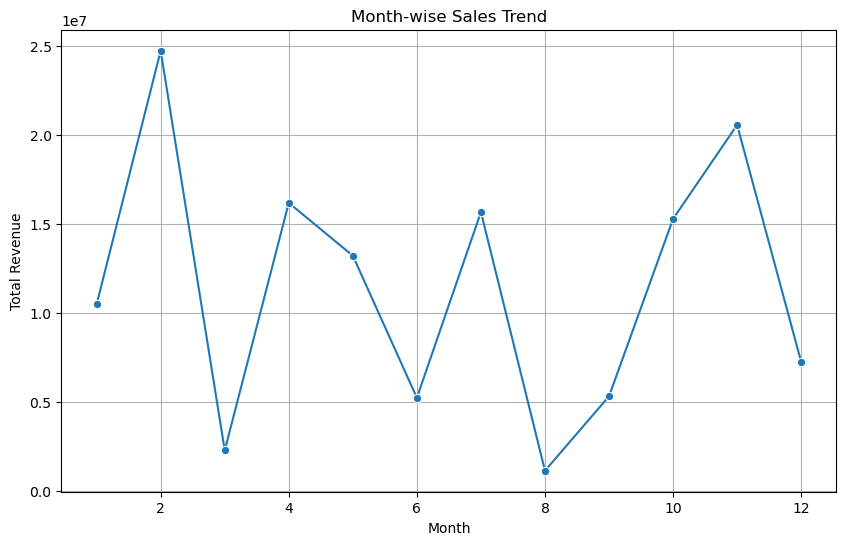

In [8]:
# Extract month and year from 'Order Date'
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

# Group by month and calculate total revenue
monthly_sales = data.groupby('Month')['Total Revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Revenue', marker='o')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

#### b. Year-wise Sales Trend

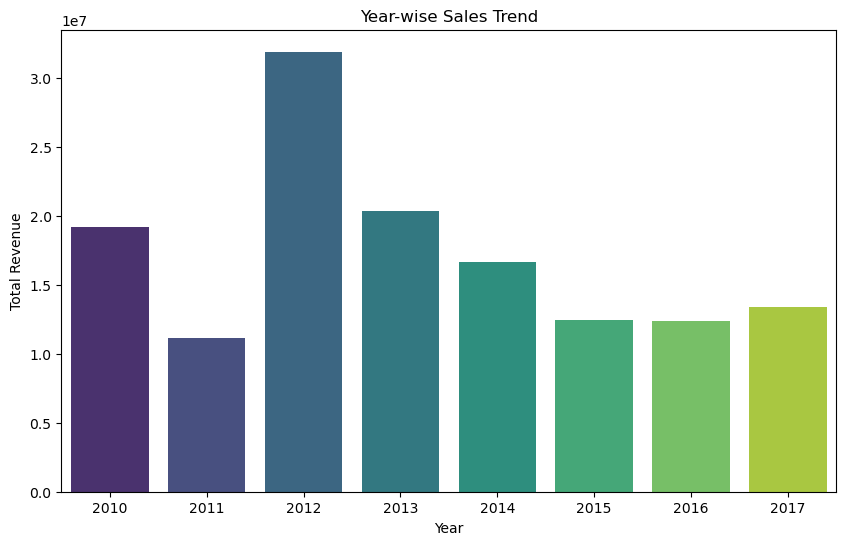

In [10]:
# Group by year and calculate total revenue
yearly_sales = data.groupby('Year')['Total Revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_sales, x='Year', y='Total Revenue', palette='viridis')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

#### c. Yearly-Month-wise Sales Trend

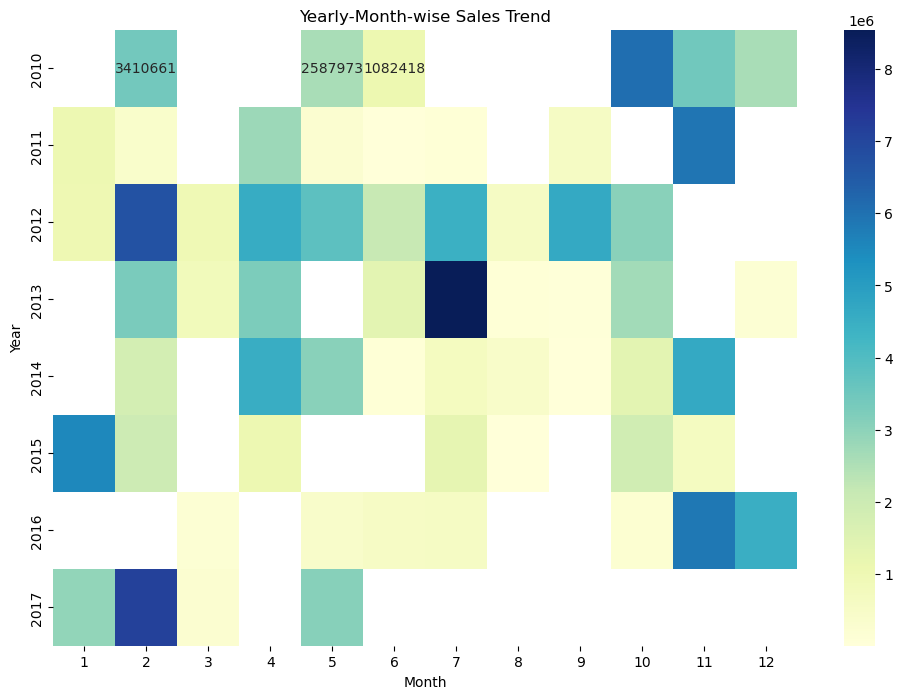

In [12]:
# Group by year and month, and calculate total revenue
year_month_sales = data.groupby(['Year', 'Month'])['Total Revenue'].sum().unstack()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(year_month_sales, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Yearly-Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

### 3. Key Metrics Identification
#### a. Total Revenue by Region

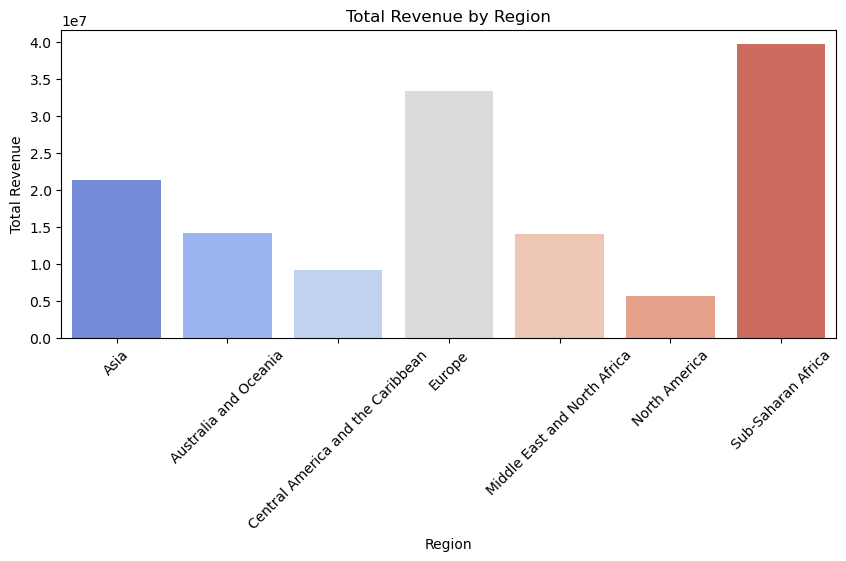

In [14]:
# Group by region and calculate total revenue
region_sales = data.groupby('Region')['Total Revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(data=region_sales, x='Region', y='Total Revenue', palette='coolwarm')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

#### b. Total Profit by Item Type

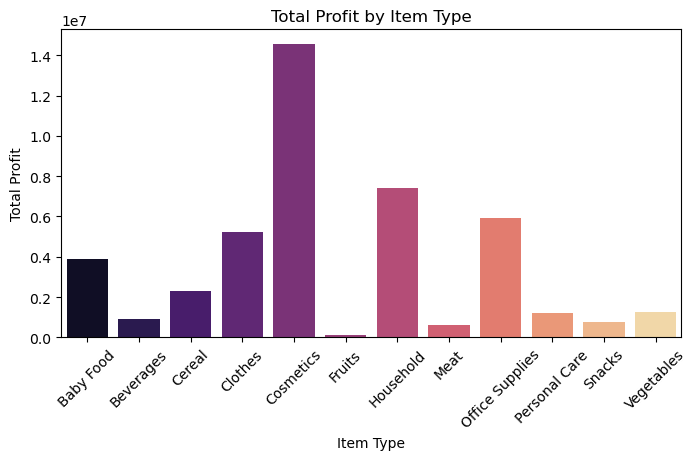

In [16]:
# Group by item type and calculate total profit
item_profit = data.groupby('Item Type')['Total Profit'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=item_profit, x='Item Type', y='Total Profit', palette='magma')
plt.title('Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

#### c. Units Sold by Sales Channel

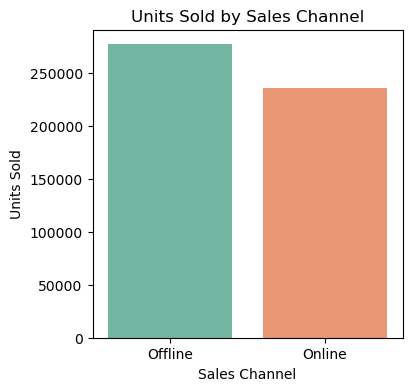

In [18]:
# Group by sales channel and calculate total units sold
channel_units = data.groupby('Sales Channel')['Units Sold'].sum().reset_index()

# Plot
plt.figure(figsize=(4, 4))
sns.barplot(data=channel_units, x='Sales Channel', y='Units Sold', palette='Set2')
plt.title('Units Sold by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Units Sold')
plt.show()

### 4. Correlation Heatmap
#### To identify relationships between different numerical variables:

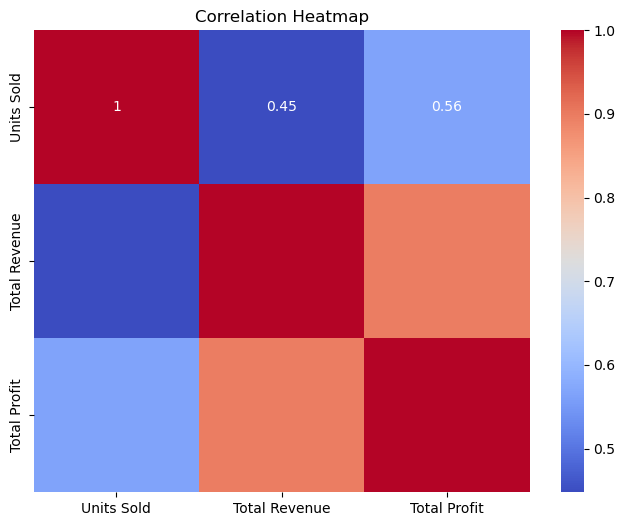

In [20]:
# Calculate correlation matrix
correlation_matrix = data[['Units Sold', 'Total Revenue', 'Total Profit']].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()